# CIS 4526 Sp23 HomeWork 4

### classifying weather by taking pictures

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
# run the following if it is the first time
try:
    import cv2
except:
    os.system("pip install opencv-python")

In [3]:
import cv2

### The purpose of this homework is to give you a chance to practice what you have learned in using Convolution Neural Network 

***Make sure you have download the weather_data.zip file from Canvas and save it under a subfolder name data/weather_data***

In [4]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


weather_data = '/kaggle/input/weather-data/weather_data'

In [5]:
cloud_set = [
    '{}/{}'.format(weather_data,i) 
    for i in os.listdir(weather_data) 
    if 'cloudy' in i
]
rain_set = [
    '{}/{}'.format(weather_data,i) 
    for i in os.listdir(weather_data) 
    if 'rain' in i
]
sunrise_set = [
    '{}/{}'.format(weather_data,i) 
    for i in os.listdir(weather_data) 
    if 'sunrise' in i
]
sunshine_set = [
    '{}/{}'.format(weather_data,i) 
    for i in os.listdir(weather_data) 
    if 'shine' in i
]

In [6]:
cloud_set

['/kaggle/input/weather-data/weather_data/cloudy88.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy167.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy78.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy80.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy2.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy89.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy99.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy256.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy9.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy185.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy208.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy44.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy269.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy102.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy20.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy30.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy71.jpg',
 '/kaggle/input/weather-dat

In [7]:
# Randomly Shuffle the order of the images files
random.shuffle(cloud_set)
random.shuffle(rain_set)
random.shuffle(sunrise_set)
random.shuffle(sunshine_set)

In [8]:
cloud_set

['/kaggle/input/weather-data/weather_data/cloudy116.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy150.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy145.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy8.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy92.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy114.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy207.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy68.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy13.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy62.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy74.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy240.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy300.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy263.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy214.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy38.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy31.jpg',
 '/kaggle/input/weather

In [9]:
# Now randomly split the image files into a training set and a testing set
train_set = cloud_set[:150] + rain_set[:150] + sunrise_set[:150] + sunshine_set[:150]
test_set = cloud_set[150:] + rain_set[150:] + sunrise_set[:150] + sunshine_set[:150]

In [10]:
train_set

['/kaggle/input/weather-data/weather_data/cloudy116.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy150.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy145.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy8.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy92.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy114.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy207.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy68.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy13.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy62.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy74.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy240.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy300.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy263.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy214.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy38.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy31.jpg',
 '/kaggle/input/weather

In [11]:
# define a few parameters
n_rows = 150
n_cols = 150
channels = 3 # RBG

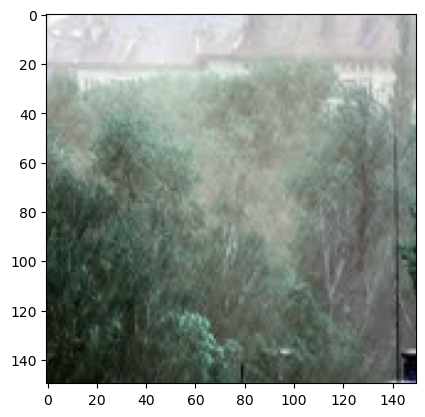

In [12]:
# Display some images
idx = 200
#image = train_set[idx]
image = f"{weather_data}/rain140.jpg"
cv2.imread(image, cv2.IMREAD_COLOR)
img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)

In [13]:
# Create the X_train, X_test, y_train, y_test
X_train = []
X_test = []
y_train = []
y_test = []

# 7.) Read and Label Each Image in the Training Set
for image in train_set:
    try:
        X_train.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_train.append(1)
        elif 'rain' in image:
            y_train.append(2)
        elif 'sunrise' in image:
            y_train.append(3)
        elif 'shine' in image:
            y_train.append(4)
    except Exception:
        print('Failed to format: ', image)

# 8.) Read and Label Each Image in the Testing Set
for image in test_set:
    try:
        X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_test.append(1)
        elif 'rain' in image:
            y_test.append(2)
        elif 'sunrise' in image:
            y_test.append(3)
        elif 'shine' in image:
            y_test.append(4)
    except Exception:
        print('Failed to format: ', image)

Failed to format:  /kaggle/input/weather-data/weather_data/shine131.jpg
Failed to format:  /kaggle/input/weather-data/weather_data/shine131.jpg


<AxesSubplot:xlabel='y_train', ylabel='count'>

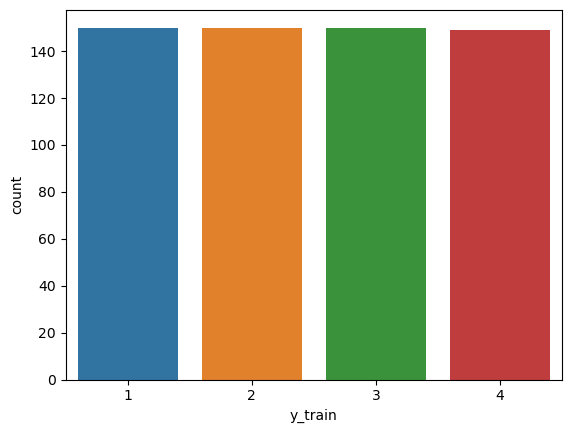

In [14]:
# sns.countplot(y_train)
sns.countplot(x='y_train',data=pd.DataFrame({'y_train':y_train}))

In [15]:
# Convert to Numpy Arrays and Switch Targets to Categorical
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

[0. 1. 0. 0. 0.]


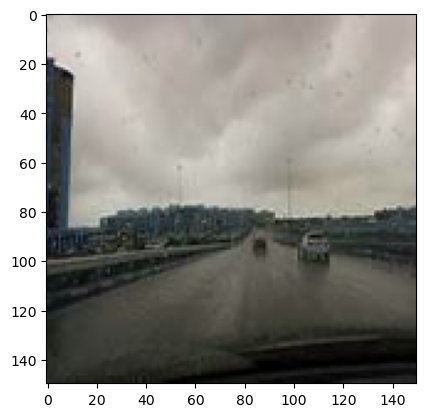

In [16]:
# display some X_test, y_test
idx = 1
#idx = 435
print(y_test[idx])
plt.imshow(X_test[idx])

### Now finally we have the data setup and we can build some classification model using CNN

### Make sure your work include the following steps

* Define, Compile and Run one CNN model
* Plot the learning curve
* Try a few different different network structure by varying the number of hidden nodes and with and without Dropout
* Try two different Dropout percentage
* Comment on your result, in particular if the Dropout helps or not

***Type your code here***

In [17]:
X_test[idx].shape

(150, 150, 3)

In [18]:
# Define your model here

# ...
# 13.) Model Summary
# define a small convent

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers

inputs = layers.Input(shape=(150, 150, 3))
# for color images, may need to scale and normalize the inputs
# x = layers.Rescaling(1./255)(inputs)
# x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Dropout(.5)(x)
x = Flatten()(x)
outputs = Dense(units=5, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)
print(model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856 

### Hint if you convert your y label using one-hot encoding, then use categorical_crossentropy instead of sparse_categorical_crossentropy, you may want to use Dense(5, ...) as your last output layer

In [19]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((599, 150, 150, 3), (599, 5), (513, 150, 150, 3), (513, 5))

# 14.) Compile and Train the Model
* model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
* history = model.fit(X_train, y_train, validation_data=(X_test, y_test), ....)

In [20]:
from tensorflow.keras import metrics

dir(metrics)

['AUC',
 'Accuracy',
 'BinaryAccuracy',
 'BinaryCrossentropy',
 'BinaryIoU',
 'CategoricalAccuracy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'FalseNegatives',
 'FalsePositives',
 'Hinge',
 'IoU',
 'KLD',
 'KLDivergence',
 'LogCoshError',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'Mean',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanIoU',
 'MeanMetricWrapper',
 'MeanRelativeError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'MeanTensor',
 'Metric',
 'OneHotIoU',
 'OneHotMeanIoU',
 'Poisson',
 'Precision',
 'PrecisionAtRecall',
 'Recall',
 'RecallAtPrecision',
 'RootMeanSquaredError',
 'SensitivityAtSpecificity',
 'SparseCategoricalAccuracy',
 'SparseCategoricalCrossentropy',
 'SparseTopKCategoricalAccuracy',
 'SpecificityAtSensitivity',
 'SquaredHinge',
 'Sum',
 'TopKCategoricalAccuracy',
 'TrueNegatives',
 'TruePositives',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

filepath = '/kaggle/working/with_dropout.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

metrics = ['Recall','Precision','accuracy']
model.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics,)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100


2023-04-29 21:07:50.167964: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


8/8 [==============================] - ETA: 0s - loss: 136.2291 - recall: 0.4134 - precision: 0.4134 - accuracy: 0.4134
Epoch 1: accuracy improved from inf to 0.41336, saving model to /kaggle/working/with_dropout.hdf5
8/8 [==============================] - 9s 175ms/step - loss: 136.2291 - recall: 0.4134 - precision: 0.4134 - accuracy: 0.4134 - val_loss: 105.8466 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
7/8 [=========================>....] - ETA: 0s - loss: 7.6906 - recall: 0.6540 - precision: 0.6555 - accuracy: 0.6540
Epoch 2: accuracy did not improve from 0.41336
8/8 [==============================] - 0s 38ms/step - loss: 7.4743 - recall: 0.6472 - precision: 0.6485 - accuracy: 0.6472 - val_loss: 9.8716 - val_recall: 0.1917 - val_precision: 0.1933 - val_accuracy: 0.1917
Epoch 3/100
7/8 [=========================>....] - ETA: 0s - loss: 1.0847 - recall: 0.7634 - precision: 0.7668 - accuracy: 0.7634
Epoch 3: accuracy did not improve from

### Plot learning Curves

***Type your code here***

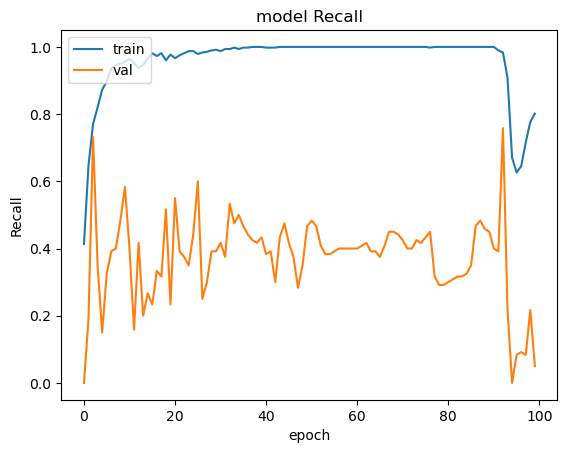

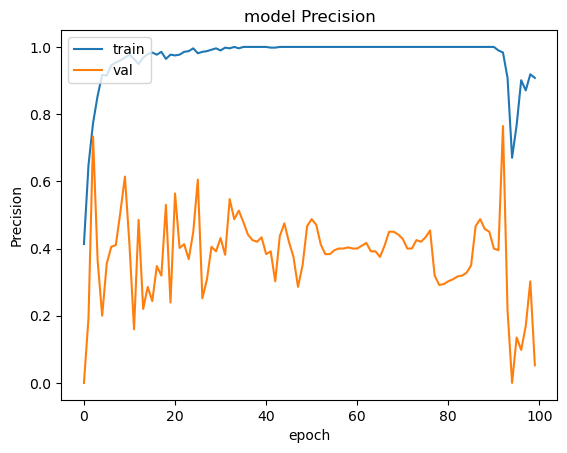

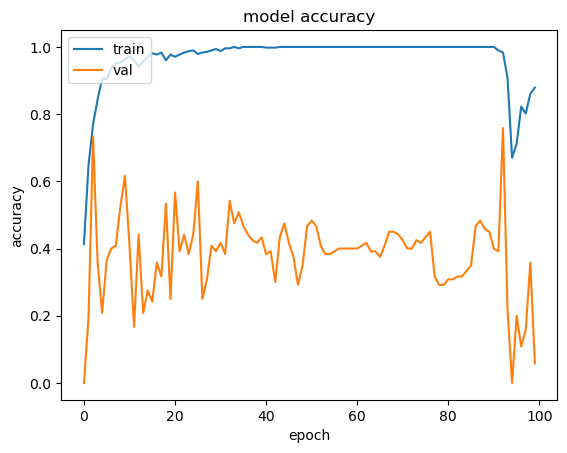

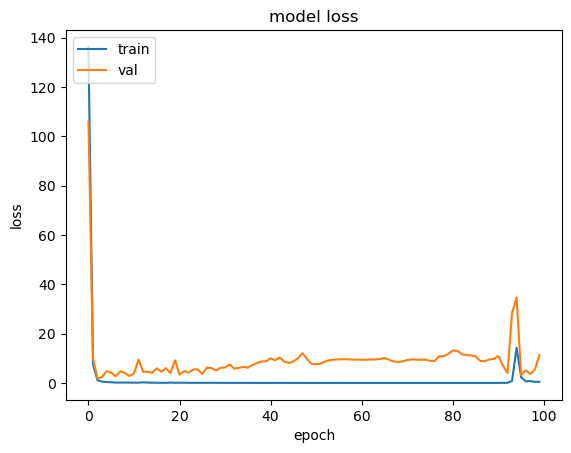

In [22]:
# Plot Accuracy Over Training Period
import matplotlib.pyplot as plt

for metric in metrics+['loss']:
    plt.plot(history.history[metric.lower()])
    plt.plot(history.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [23]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")


17/17 [==============================] - 0s 9ms/step - loss: 44.6183 - recall: 0.3996 - precision: 0.3996 - accuracy: 0.3996
Test accuracy: 0.400
Test recall: 0.400
Test precision: 0.400


### Vanilla dropout 0.2

In [24]:
# Define your model here

# ...
# 13.) Model Summary
# define a small convent

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers

inputs = layers.Input(shape=(150, 150, 3))
# for color images, may need to scale and normalize the inputs
# x = layers.Rescaling(1./255)(inputs)
# x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Dropout(.2)(x)
x = Flatten()(x)
outputs = Dense(units=5, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       7385

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

filepath = '/kaggle/working/with_dropout_2.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

metrics = ['Recall','Precision','accuracy']
model.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics,)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100


2023-04-29 21:08:34.574338: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


7/8 [=========================>....] - ETA: 0s - loss: 255.7357 - recall: 0.3951 - precision: 0.3951 - accuracy: 0.3951
Epoch 1: accuracy improved from inf to 0.41127, saving model to /kaggle/working/with_dropout_2.hdf5
8/8 [==============================] - 2s 85ms/step - loss: 239.7342 - recall: 0.4113 - precision: 0.4113 - accuracy: 0.4113 - val_loss: 7.9190 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
7/8 [=========================>....] - ETA: 0s - loss: 2.5585 - recall: 0.5647 - precision: 0.6438 - accuracy: 0.6094
Epoch 2: accuracy did not improve from 0.41127
8/8 [==============================] - 0s 39ms/step - loss: 2.4983 - recall: 0.5637 - precision: 0.6383 - accuracy: 0.6054 - val_loss: 11.1923 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
7/8 [=========================>....] - ETA: 0s - loss: 1.4252 - recall: 0.6607 - precision: 0.7167 - accuracy: 0.6897
Epoch 3: accuracy did not 

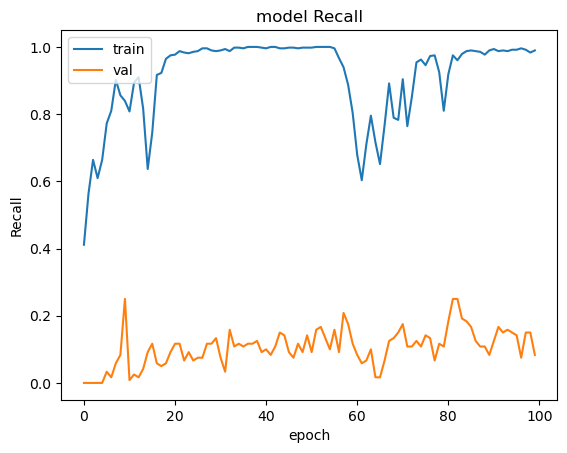

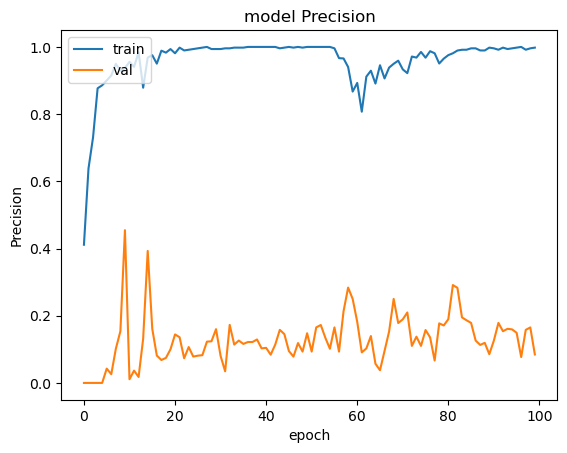

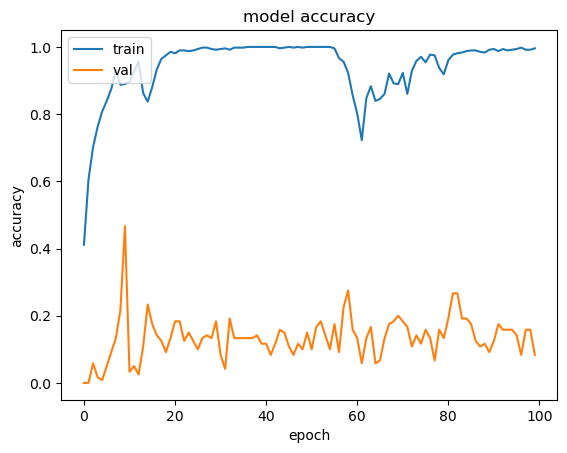

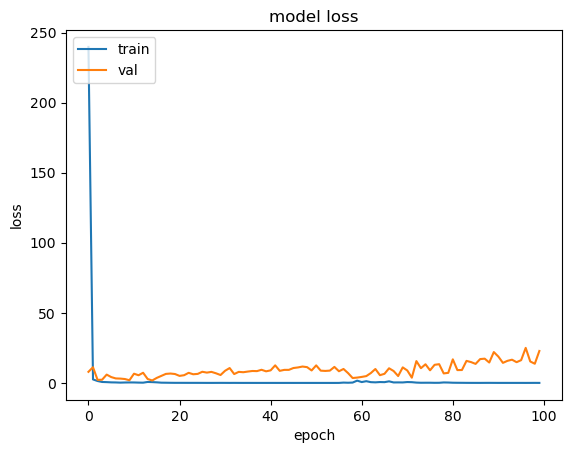

In [26]:
# Plot Accuracy Over Training Period
import matplotlib.pyplot as plt

for metric in metrics+['loss']:
    plt.plot(history.history[metric.lower()])
    plt.plot(history.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

### Evaluating the model out-of-sample

In [27]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")


17/17 [==============================] - 0s 6ms/step - loss: 4.0790 - recall: 0.5673 - precision: 0.5673 - accuracy: 0.5673
Test accuracy: 0.567
Test recall: 0.567
Test precision: 0.567


### Vanilla dropout 0.8

In [28]:
# Define your model here

# ...
# 13.) Model Summary
# define a small convent

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers

inputs = layers.Input(shape=(150, 150, 3))
# for color images, may need to scale and normalize the inputs
# x = layers.Rescaling(1./255)(inputs)
# x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Dropout(.8)(x)
x = Flatten()(x)
outputs = Dense(units=5, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       7385

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

filepath = '/kaggle/working/with_dropout_8.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

metrics = ['Recall','Precision','accuracy']
model.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics,)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100


2023-04-29 21:09:19.538419: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_2/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


7/8 [=========================>....] - ETA: 0s - loss: 89.2476 - recall: 0.3504 - precision: 0.3504 - accuracy: 0.3504 
Epoch 1: accuracy improved from inf to 0.36326, saving model to /kaggle/working/with_dropout_8.hdf5
8/8 [==============================] - 2s 84ms/step - loss: 83.9490 - recall: 0.3633 - precision: 0.3633 - accuracy: 0.3633 - val_loss: 3.4864 - val_recall: 0.4083 - val_precision: 0.4083 - val_accuracy: 0.4083
Epoch 2/100
7/8 [=========================>....] - ETA: 0s - loss: 2.5648 - recall: 0.6540 - precision: 0.6674 - accuracy: 0.6607
Epoch 2: accuracy did not improve from 0.36326
8/8 [==============================] - 0s 44ms/step - loss: 2.5172 - recall: 0.6493 - precision: 0.6631 - accuracy: 0.6555 - val_loss: 5.7811 - val_recall: 0.5250 - val_precision: 0.5339 - val_accuracy: 0.5250
Epoch 3/100
7/8 [=========================>....] - ETA: 0s - loss: 1.2703 - recall: 0.7701 - precision: 0.7805 - accuracy: 0.7723
Epoch 3: accuracy did not improve from 0.36326
8/8 [

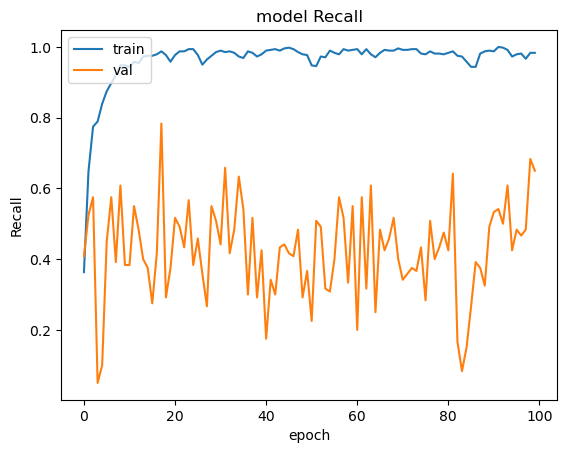

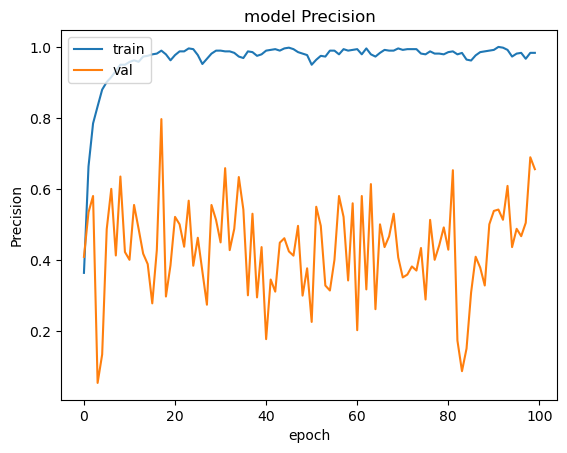

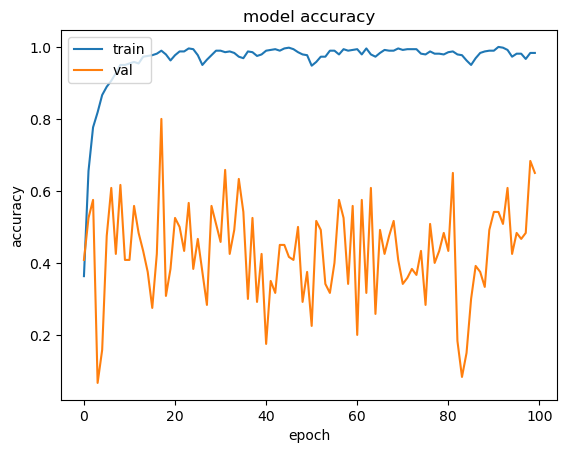

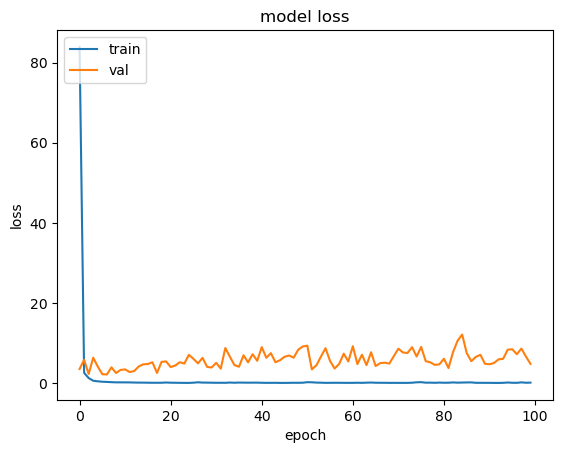

In [30]:
# Plot Accuracy Over Training Period
import matplotlib.pyplot as plt

for metric in metrics+['loss']:
    plt.plot(history.history[metric.lower()])
    plt.plot(history.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [31]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 0s 8ms/step - loss: 4.4130 - recall: 0.5283 - precision: 0.5293 - accuracy: 0.5283
Test accuracy: 0.528
Test recall: 0.528
Test precision: 0.529


### Model 1 with No dropout


In [32]:
# for color images, may need to scale and normalize the inputs
inputs = layers.Input(shape=(150, 150, 3))
# x = layers.Rescaling(1./255)(inputs)
# x = layers.BatchNormalization()(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
# x = layers.Dropout(.5)(x)
x = Flatten()(x)
outputs = Dense(units=5, activation="softmax")(x)
model1 = Model(inputs=inputs, outputs=outputs)
print(model1.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 32)        1846

In [33]:
filepath = '/kaggle/working/without_dropout.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

model1.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics)

history1 = model1.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 89.4961 - recall: 0.2944 - precision: 0.2944 - accuracy: 0.2944
Epoch 1: accuracy improved from inf to 0.29436, saving model to /kaggle/working/without_dropout.hdf5
8/8 [==============================] - 4s 217ms/step - loss: 89.4961 - recall: 0.2944 - precision: 0.2944 - accuracy: 0.2944 - val_loss: 1.8301 - val_recall: 0.6833 - val_precision: 0.6833 - val_accuracy: 0.6833
Epoch 2/100
7/8 [=========================>....] - ETA: 0s - loss: 19.2115 - recall: 0.4062 - precision: 0.4072 - accuracy: 0.4062
Epoch 2: accuracy did not improve from 0.29436
8/8 [==============================] - 0s 50ms/step - loss: 18.9641 - recall: 0.4154 - precision: 0.4163 - accuracy: 0.4154 - val_loss: 13.6554 - val_recall: 0.5500 - val_precision: 0.5500 - val_accuracy: 0.5500
Epoch 3/100
7/8 [=========================>....] - ETA: 0s - loss: 7.9588 - recall: 0.4955 - precision: 0.5045 - accuracy: 0.5067 
Epoch 3: accuracy did not improve f

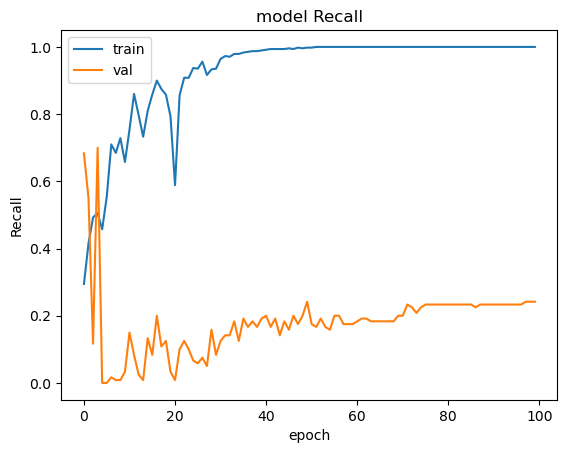

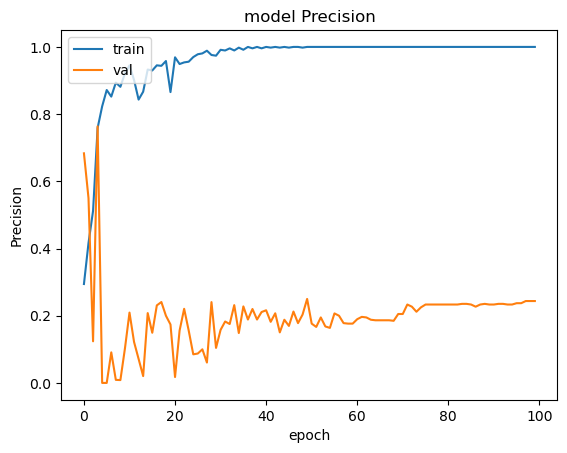

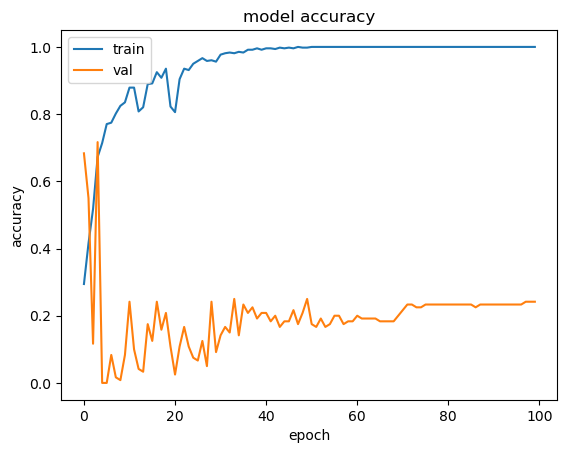

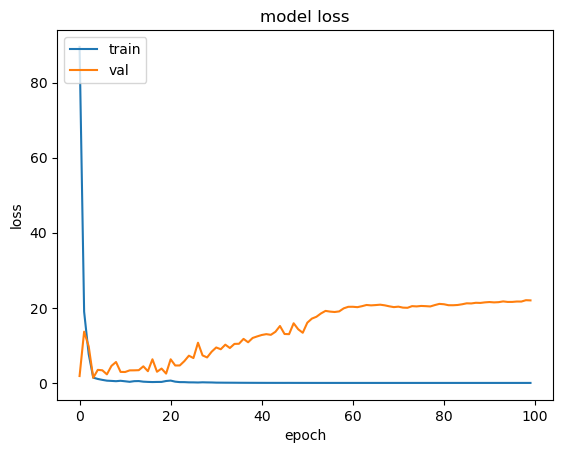

In [34]:
for metric in metrics+['loss']:
    plt.plot(history1.history[metric.lower()])
    plt.plot(history1.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [35]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 1s 11ms/step - loss: 22.3750 - recall: 0.2749 - precision: 0.2749 - accuracy: 0.2749
Test accuracy: 0.275
Test recall: 0.275
Test precision: 0.275


### Try transfer learning with pretrained VGG with dropout 0.5

In [36]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152, Xception,VGG19,EfficientNetB4

input_shape = (150,150,3)
num_classes = 5
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in vgg_model.layers:
    layer.trainable = False
    
x = layers.Dropout(.5)(vgg_model.output)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

model_vgg = Model(inputs=vgg_model.input, outputs=x)
model_vgg.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                            

In [37]:
filepath = '/kaggle/working/vgg_dropout.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

model_vgg.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics)

history_vgg = model_vgg.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100


2023-04-29 21:11:32.629776: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_4/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


8/8 [==============================] - ETA: 0s - loss: 8.9362 - recall: 0.7161 - precision: 0.7206 - accuracy: 0.7182
Epoch 1: accuracy improved from inf to 0.71816, saving model to /kaggle/working/vgg_dropout.hdf5
8/8 [==============================] - 9s 736ms/step - loss: 8.9362 - recall: 0.7161 - precision: 0.7206 - accuracy: 0.7182 - val_loss: 70.2565 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
7/8 [=========================>....] - ETA: 0s - loss: 2.1942 - recall: 0.9308 - precision: 0.9308 - accuracy: 0.9308
Epoch 2: accuracy did not improve from 0.71816
8/8 [==============================] - 1s 105ms/step - loss: 2.0569 - recall: 0.9332 - precision: 0.9332 - accuracy: 0.9332 - val_loss: 6.8381 - val_recall: 0.6667 - val_precision: 0.6667 - val_accuracy: 0.6667
Epoch 3/100
7/8 [=========================>....] - ETA: 0s - loss: 0.6099 - recall: 0.9420 - precision: 0.9420 - accuracy: 0.9420
Epoch 3: accuracy did not improve from 0.71

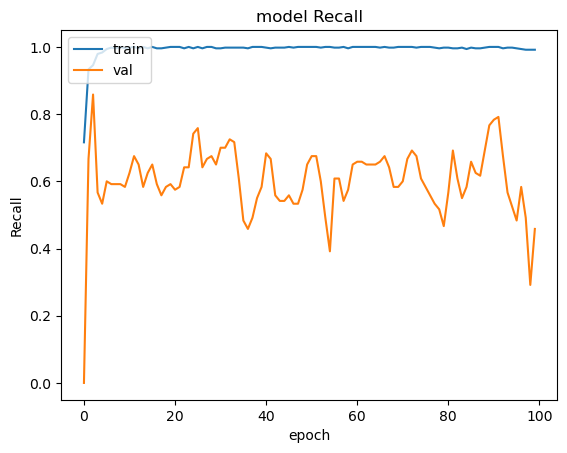

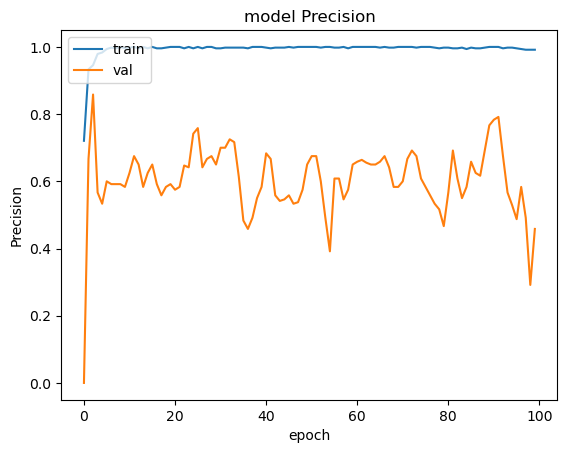

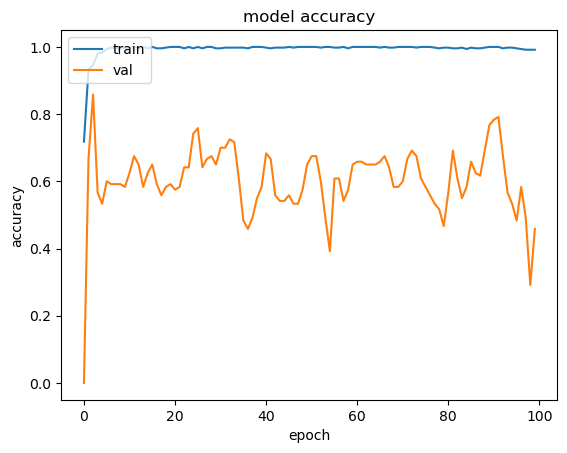

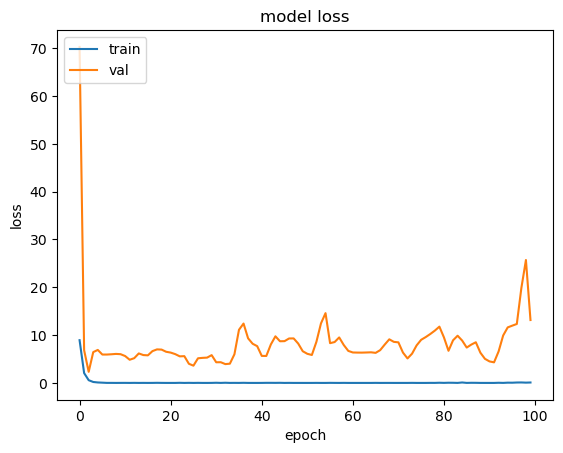

In [38]:
for metric in metrics+['loss']:
    plt.plot(history_vgg.history[metric.lower()])
    plt.plot(history_vgg.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [39]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 3s 49ms/step - loss: 19.5498 - recall: 0.6901 - precision: 0.6901 - accuracy: 0.6901
Test accuracy: 0.690
Test recall: 0.690
Test precision: 0.690


### VGG without dropout

In [40]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152, Xception,VGG19,EfficientNetB4

input_shape = (150,150,3)
num_classes = 5
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in vgg_model.layers:
    layer.trainable = False
    
x = Flatten()(vgg_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

model_vgg = Model(inputs=vgg_model.input, outputs=x)
model_vgg.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [41]:
filepath = '/kaggle/working/vgg_without_dropout.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

model_vgg.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics)

history_vgg = model_vgg.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100
7/8 [=========================>....] - ETA: 0s - loss: 3.1815 - recall: 0.7388 - precision: 0.7438 - accuracy: 0.7411
Epoch 1: accuracy improved from inf to 0.75574, saving model to /kaggle/working/vgg_without_dropout.hdf5
8/8 [==============================] - 3s 189ms/step - loss: 2.9905 - recall: 0.7537 - precision: 0.7584 - accuracy: 0.7557 - val_loss: 2.5989 - val_recall: 0.7417 - val_precision: 0.7417 - val_accuracy: 0.7417
Epoch 2/100
7/8 [=========================>....] - ETA: 0s - loss: 0.4946 - recall: 0.9688 - precision: 0.9688 - accuracy: 0.9688
Epoch 2: accuracy did not improve from 0.75574
8/8 [==============================] - 1s 94ms/step - loss: 0.4626 - recall: 0.9708 - precision: 0.9708 - accuracy: 0.9708 - val_loss: 17.3701 - val_recall: 0.3667 - val_precision: 0.3667 - val_accuracy: 0.3667
Epoch 3/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0316 - recall: 0.9933 - precision: 0.9933 - accuracy: 0.9933
Epoch 3: accuracy did not improve fr

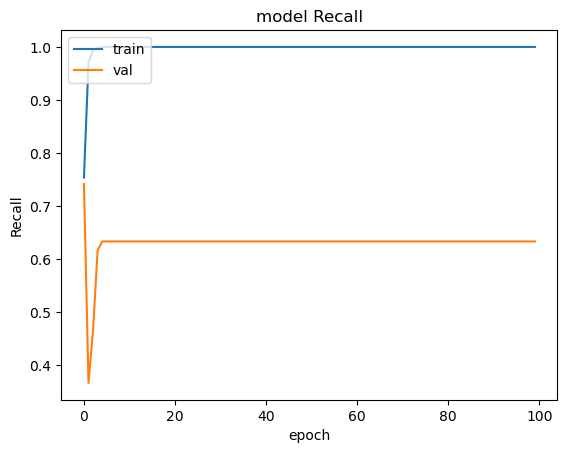

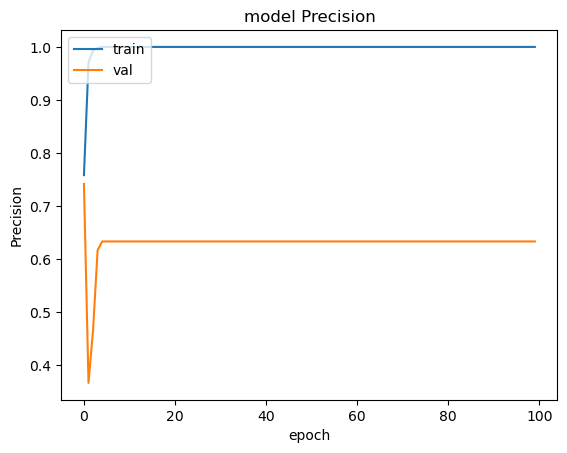

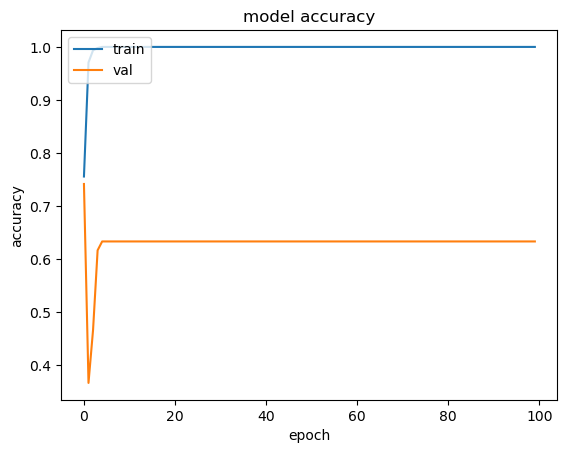

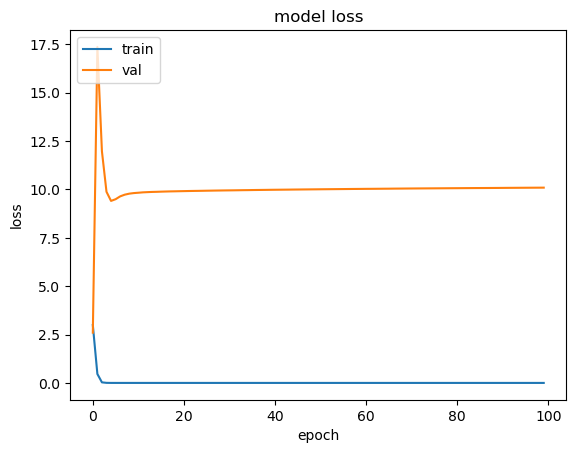

In [42]:
for metric in metrics+['loss']:
    plt.plot(history_vgg.history[metric.lower()])
    plt.plot(history_vgg.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [43]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 1s 39ms/step - loss: 1.0866 - recall: 0.8947 - precision: 0.8947 - accuracy: 0.8947
Test accuracy: 0.895
Test recall: 0.895
Test precision: 0.895


### VGG no dropout, no early stopping

In [44]:
model_vgg.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics)

history_vgg = model_vgg.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 2s 143ms/step - loss: 0.0184 - recall: 0.9979 - precision: 0.9979 - accuracy: 0.9979 - val_loss: 15.1558 - val_recall: 0.4417 - val_precision: 0.4417 - val_accuracy: 0.4417
Epoch 2/100
8/8 [==============================] - 1s 95ms/step - loss: 0.0288 - recall: 0.9916 - precision: 0.9916 - accuracy: 0.9916 - val_loss: 18.3158 - val_recall: 0.4500 - val_precision: 0.4500 - val_accuracy: 0.4500
Epoch 3/100
8/8 [==============================] - 1s 94ms/step - loss: 0.0526 - recall: 0.9937 - precision: 0.9937 - accuracy: 0.9937 - val_loss: 13.1072 - val_recall: 0.5333 - val_precision: 0.5333 - val_accuracy: 0.5333
Epoch 4/100
8/8 [==============================] - 1s 117ms/step - loss: 0.0325 - recall: 0.9958 - precision: 0.9958 - accuracy: 0.9958 - val_loss: 12.0405 - val_recall: 0.5417 - val_precision: 0.5417 - val_accuracy: 0.5417
Epoch 5/100
8/8 [==============================] - 1s 94ms/step - loss: 0.0242 - recall: 0.9979 - precisio

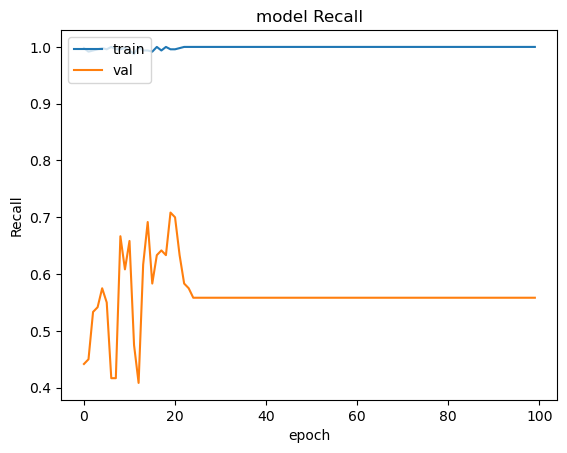

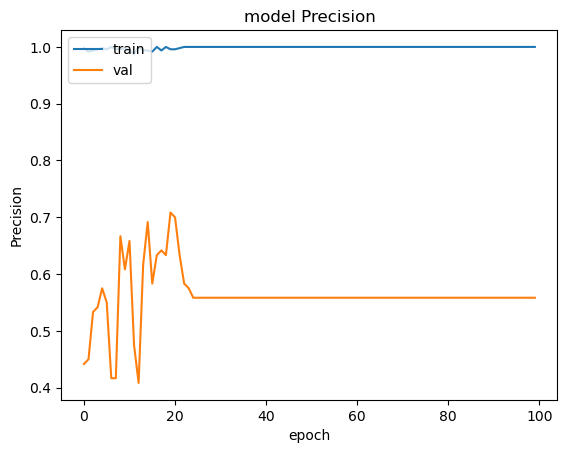

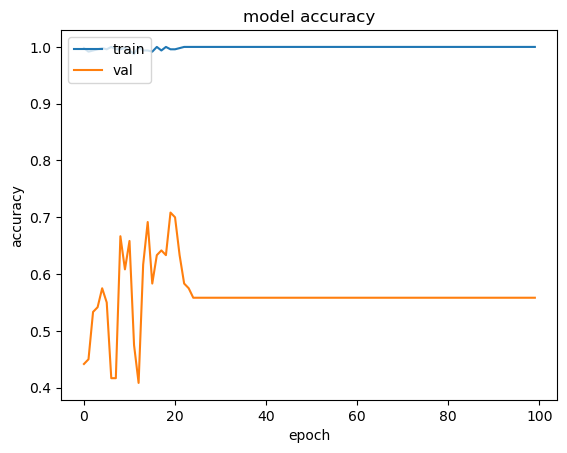

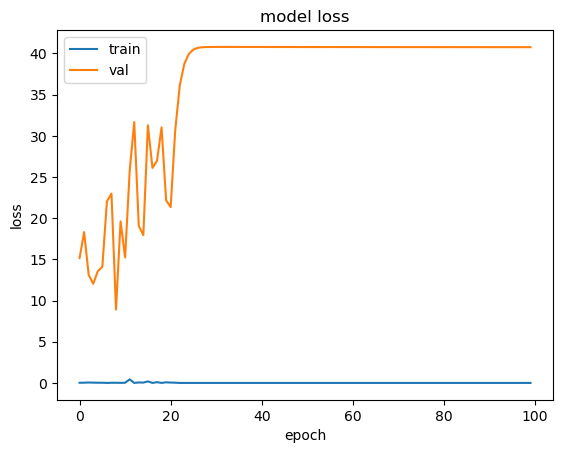

In [45]:
for metric in metrics+['loss']:
    plt.plot(history_vgg.history[metric.lower()])
    plt.plot(history_vgg.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [46]:
# Type your code here
test_loss, test_re,test_pr,test_acc = model_vgg.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 1s 39ms/step - loss: 9.9643 - recall: 0.8869 - precision: 0.8869 - accuracy: 0.8869
Test accuracy: 0.887
Test recall: 0.887
Test precision: 0.887


### Comment on your results

On the topic of the effects of dropout as a regularizing component to the fitted model, it is not apparant that dropout has any overall beneficial effect to model performance on out of sample data. Dropout does seem to counter the effects of overfitting as visualized in the Vanilla loss callbacks as the loss callback curves progress relatively in sync. Contrary to Machine learning community conventional beliefs, my anecdotal experiments here seems to indicate that mitigating overfitting in models have no beneficial effects to performance on out of sample data but actually detrimental effects. The less regulizing effects to counter overfitting, the higher the model performance on out of sample data.